In [11]:
import pandas as pd

# Load train data
data = pd.read_csv('../data/ml/hotel_reservations_train.csv')
X_train = data.drop('booking_status', axis=1)
y_train = data['booking_status']

In [12]:
# Load test data
data = pd.read_csv('../data/ml/hotel_reservations_test.csv')
X_test = data.drop('booking_status', axis=1)
y_test = data['booking_status']

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [14]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    verbosity=1,
    objective='binary:logistic',
    booster='gbtree',
    tree_method='auto',
    n_jobs=1,
    gpu_id=-1,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=42,
    missing=0, 
    num_parallel_tree=1,
    importance_type='gain',
)

# Train model
model_xgb.fit(X_train, y_train)

# Use predict method on test data
y_pred_xgb = model_xgb.predict(X_test)

Accuracy: 0.85
Precision: 0.84
Recall: 0.85
F1 Score: 0.84
Balanced Accuracy: 0.81
ROC AUC: 0.81


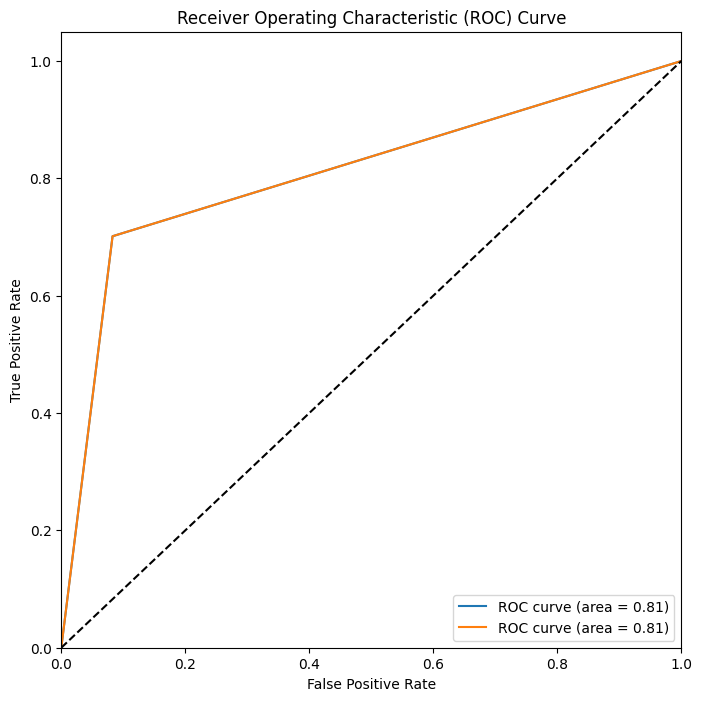

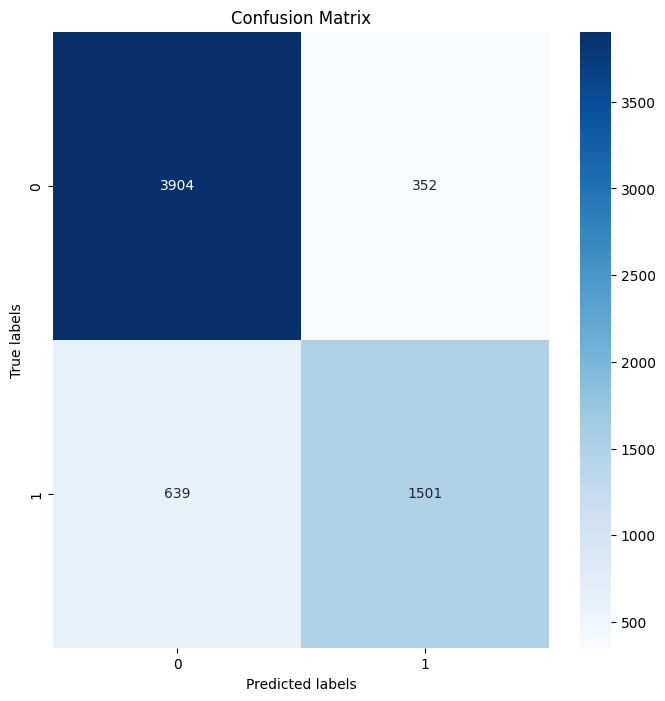

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4256
           1       0.81      0.70      0.75      2140

    accuracy                           0.85      6396
   macro avg       0.83      0.81      0.82      6396
weighted avg       0.84      0.85      0.84      6396



In [15]:
# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy:.2f}')

# Compute the precision score
precision = precision_score(y_test, y_pred_xgb, average='weighted')
print(f'Precision: {precision:.2f}')

# Compute the recall score
recall = recall_score(y_test, y_pred_xgb, average='weighted')
print(f'Recall: {recall:.2f}')

# Compute the F1 score
f1 = f1_score(y_test, y_pred_xgb, average='weighted')
print(f'F1 Score: {f1:.2f}')

# Compute the balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_xgb)
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_xgb, average='weighted', multi_class='ovr')
print(f'ROC AUC: {roc_auc:.2f}')

# Compute the ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_xgb)
    roc_auc[i] = roc_auc_score(y_test, y_pred_xgb)
    
# Plot the ROC curve
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.savefig('../reports/images/roc_curve_xgb.png')
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.savefig('../reports/images/confusion_matrix_xgb.png')
plt.show()

# Compute the classification report
cr = classification_report(y_test, y_pred_xgb)
print(cr)